In [3]:
import joblib
import torch, random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator

In [4]:
BC_filename = 'OMGP_model/limited_random_BC/learner12.pickle'
DART_filename = 'OMGP_model/limited_random_DART/learnerDART.pickle'

In [5]:
models = [DART1_filename,DART2_filename,DART3_filename
          ,BC1_filename,BC2_filename,BC3_filename]

NameError: name 'DART1_filename' is not defined

In [66]:
BC_filename = 'IMGP_model/BC/learner12.pickle'
DART_filename = 'IMGP_model/DART/learner6.pickle'

467


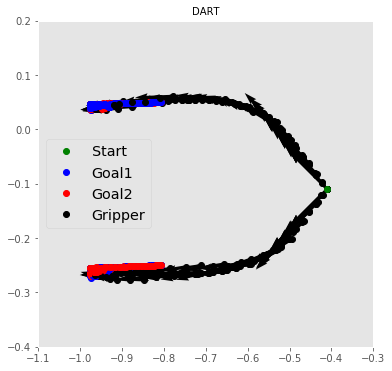

In [70]:
model_name = 'DART'
if model_name == 'DART' :
    filename = DART_filename
elif model_name == 'BC' :
    filename = BC_filename
model = joblib.load(filename)
state = model.X.numpy()
action = model.Y.numpy()
print(model.N)
l=1
start = 0
plt.style.use("ggplot")
plt.figure(figsize=(6,6))
for l in range(start,model.N):
    
    X= state[l,4]
    Y= state[l,5]
    U = action[l,0]*0.2
    V = action[l,1]*0.2
    Goal1_x = state[l,0]
    Goal1_y = state[l,2]
    Goal2_x = state[l,1]
    Goal2_y = state[l,3]
    plt.plot(Goal1_x,Goal1_y,'bo')
    plt.plot(Goal2_x,Goal2_y,'ro')
    if (l%2)==0 :
        plt.quiver(X, Y, U, V,units='xy' ,scale=1)
        plt.plot(X,Y,'ko')
e_x = state[0,4]
e_y = state[0,5]
plt.plot(e_x,e_y,'go',label='Start')
plt.plot(Goal1_x,Goal1_y,'bo',label='Goal1')
plt.plot(Goal2_x,Goal2_y,'ro',label='Goal2')
plt.plot(X,Y,'ko',label='Gripper')
plt.grid()

# ax.set_aspect('equal')
x_range = [-1.1,-0.3]
y_range = [-0.4,0.2]
plt.xlim(x_range[0],x_range[1])
plt.ylim(y_range[0],y_range[1])

plt.title(model_name,fontsize=10)
plt.legend(fontsize='x-large')
plt.savefig(model_name+'.png', bbox_inches='tight')
plt.show()

In [71]:
L = 10
l = L*1j
Y, X = np.mgrid[y_range[0]:y_range[1]:l,x_range[0]:x_range[1]:l]
state = np.zeros((6,L,L))
state[0,:],state[1,:],state[2,:],state[3,:] = Goal1_x+0.05,Goal2_x+0.05,Goal1_y,Goal2_y
# state[0,:],state[1,:] = np.random.uniform(x_range[0],x_range[1]-0.2,2)
# state[0,:],state[1,:] = np.random.uniform(-0.95,-0.96,2)
# state[2,:],state[3,:] = np.random.uniform(y_range[0],y_range[1],2)
state[4,:] = X
state[5,:] = Y
state = torch.tensor(state).float()
U0 = torch.zeros((L,L))
V0 = torch.zeros((L,L))
lw0 = torch.zeros((L,L))
U1 = torch.zeros((L,L))
V1 = torch.zeros((L,L))
lw1 = torch.zeros((L,L))

for i in range(L):
    for j in range(L):
        a, s = model.predict(state[:,i,j][None,...])
        U0[i,j] = a[0][0][0]
        V0[i,j] = a[0][0][1]
        lw0[i,j] = s[0][0]
        
        U1[i,j] = a[1][0][0]
        V1[i,j] = a[1][0][1]
        lw1[i,j] = s[1][0]
lw0= (lw0.numpy())
lw1= lw1.numpy()
lw0 /=lw0.max()
lw1 /=lw1.max()
# lw0 /=102
# lw1 /=102

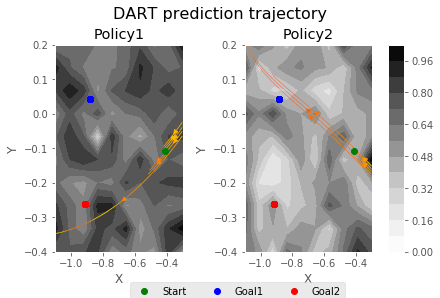

In [72]:
plt.close()
fig, axs = plt.subplots(1, 2, constrained_layout=True)
end_x = np.linspace(e_x-0.0002, e_x+0.0002, num=100)
end_y = np.linspace(e_y-0.02, e_y+0.02, num=100)
seed_points = np.array([end_x, end_y])
# levels = MaxNLocator(nbins=15).tick_values(lw0.min(), lw0.max())
levels = MaxNLocator(nbins=15).tick_values(0.0, 1.0)
cmap = plt.get_cmap('Greys')
direc = plt.get_cmap('Purples')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)
# axs[0].streamplot(X, Y, U0, V0, color=lw0,density=1.0, linewidth=lw0 ,cmap=direc)
axs[0].streamplot(X, Y, U0, V0, color=lw0,density=3.0, linewidth=lw0,cmap='autumn',start_points=seed_points.T)
# axs[0].pcolormesh(X,Y,lw0, cmap = 'Greys', norm=norm)
axs[0].contourf(X ,Y, lw0, levels=levels, cmap=cmap)
axs[0].set_title('Policy1')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[0].plot(e_x,e_y,'go')
axs[0].plot(state[0,0],state[2,0],'bo')
axs[0].plot(state[1,0],state[3,0],'ro')

# strm=axs[1].streamplot(X, Y, U1, V1, color=lw1,density=1.0, linewidth=lw1,cmap=direc)
axs[1].streamplot(X, Y, U1, V1, color=lw1,density=3.0, linewidth=lw1,cmap='autumn',start_points=seed_points.T)
CS = axs[1].contourf(X ,Y, lw1, levels=levels, cmap=cmap)
axs[1].set_ylabel('Y')
axs[1].set_xlabel('X')
axs[1].set_title('Policy2')
axs[1].plot(e_x,e_y,'go',label='Start')
axs[1].plot(state[0,0],state[2,0],'bo',label='Goal1')
axs[1].plot(state[1,0],state[3,0],'ro',label='Goal2')
# fig.legend(loc=8, , mode="expand")
fig.legend(loc=8,bbox_to_anchor=(0.55, -0.025),ncol=3)
fig.suptitle(model_name+' prediction trajectory',fontsize=16)
fig.colorbar(CS)
plt.savefig(model_name+'prediction.png', bbox_inches='tight')

In [17]:
def graph(filename,i):
    model = joblib.load(filename)
    state = model.X.numpy()
    action = model.Y.numpy()
    print(model.N)
    l=1
    start = 0
    plt.figure(figsize=(6,6))
    for l in range(start,model.N):
        
        X= state[l,4]
        Y= state[l,5]
        U = action[l,0]*0.2
        V = action[l,1]*0.2
        Goal1_x = state[l,0]
        Goal1_y = state[l,2]
        Goal2_x = state[l,1]
        Goal2_y = state[l,3]
        plt.plot(Goal1_x,Goal1_y,'bo')
        plt.plot(Goal2_x,Goal2_y,'ro')
        if (l%2)==0 :
            plt.quiver(X, Y, U, V,units='xy' ,scale=1)
            plt.plot(X,Y,'ko')
    e_x = state[0,4]
    e_y = state[0,5]
    plt.plot(e_x,e_y,'go',label='Start')
    plt.plot(Goal1_x,Goal1_y,'bo',label='Goal1')
    plt.plot(Goal2_x,Goal2_y,'ro',label='Goal2')
    plt.plot(X,Y,'ko',label='Gripper')
    plt.grid()

    # ax.set_aspect('equal')
    x_range = [-1.1,-0.3]
    y_range = [-0.4,0.2]
    plt.xlim(x_range[0],x_range[1])
    plt.ylim(y_range[0],y_range[1])

    plt.title(filename,fontsize=10)
    plt.legend(fontsize='x-large')
    # plt.savefig(filename+str(i)+'.png', bbox_inches='tight')
    plt.clf()
    L = 10
    l = L*1j
    Y, X = np.mgrid[y_range[0]:y_range[1]:l,x_range[0]:x_range[1]:l]
    state = np.zeros((6,L,L))
    state[0,:],state[1,:],state[2,:],state[3,:] = Goal1_x,Goal2_x,Goal1_y,Goal2_y
    # state[0,:],state[1,:] = np.random.uniform(x_range[0],x_range[1]-0.2,2)
    # state[2,:],state[3,:] = np.random.uniform(y_range[0],y_range[1],2)
    state[4,:] = X
    state[5,:] = Y
    state = torch.tensor(state).float()
    U0 = torch.zeros((L,L))
    V0 = torch.zeros((L,L))
    lw0 = torch.zeros((L,L))
    U1 = torch.zeros((L,L))
    V1 = torch.zeros((L,L))
    lw1 = torch.zeros((L,L))

    for i in range(L):
        for j in range(L):
            a, s = model.predict(state[:,i,j][None,...])
            U0[i,j] = a[0][0][0]
            V0[i,j] = a[0][0][1]
            lw0[i,j] = (1/s[0][0])
            
            U1[i,j] = a[1][0][0]
            V1[i,j] = a[1][0][1]
            lw1[i,j] = (1/s[1][0])
    lw0= (lw0.numpy())
    lw1= lw1.numpy()
    lw0 /=lw0.max()
    lw1 /=lw1.max()
    # lw0 /=102
    # lw1 /=102
    plt.close()
    fig, axs = plt.subplots(1, 2, constrained_layout=True)
    end_x = np.linspace(e_x-0.0002, e_x+0.0002, num=100)
    end_y = np.linspace(e_y-0.15, e_y+0.15, num=100)
    seed_points = np.array([end_x, end_y])
    # levels = MaxNLocator(nbins=15).tick_values(lw0.min(), lw0.max())
    levels = MaxNLocator(nbins=15).tick_values(0.0, 1.0)
    cmap = plt.get_cmap('Greys')
    direc = plt.get_cmap('Purples')
    norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)
    # axs[0].streamplot(X, Y, U0, V0, color=lw0,density=1.0, linewidth=lw0 ,cmap=direc)
    axs[0].streamplot(X, Y, U0, V0, color=lw0,density=0.8, linewidth=lw0,cmap='autumn',start_points=seed_points.T)
    # axs[0].pcolormesh(X,Y,lw0, cmap = 'Greys', norm=norm)
    axs[0].contourf(X ,Y, lw0, levels=levels, cmap=cmap)
    axs[0].set_title('Policy1')
    axs[0].set_xlabel('X')
    axs[0].set_ylabel('Y')
    axs[0].plot(e_x,e_y,'go')
    axs[0].plot(state[0,0],state[2,0],'bo')
    axs[0].plot(state[1,0],state[3,0],'ro')

    # strm=axs[1].streamplot(X, Y, U1, V1, color=lw1,density=1.0, linewidth=lw1,cmap=direc)
    axs[1].streamplot(X, Y, U1, V1, color=lw1,density=0.8, linewidth=lw1,cmap='autumn',start_points=seed_points.T)
    CS = axs[1].contourf(X ,Y, lw1, levels=levels, cmap=cmap)
    axs[1].set_ylabel('Y')
    axs[1].set_xlabel('X')
    axs[1].set_title('Policy2')
    axs[1].plot(e_x,e_y,'go',label='Start')
    axs[1].plot(state[0,0],state[2,0],'bo',label='Goal1')
    axs[1].plot(state[1,0],state[3,0],'ro',label='Goal2')
    # fig.legend(loc=8, , mode="expand")
    fig.legend(loc=8,bbox_to_anchor=(0.55, -0.025),ncol=3)
    fig.suptitle(filename+' prediction trajectory',fontsize=16)
    fig.colorbar(CS)
    plt.savefig(filename+str(i)+'prediction.png', bbox_inches='tight')
    plt.clf()

In [ ]:
BC1_filename = 'OMGP_model/BC/learner3.pickle'
BC2_filename = 'OMGP_model/BC/learner6.pickle'
BC3_filename = 'OMGP_model/BC/learner10.pickle'
DART1_filename = 'OMGP_model/DART/learner3.pickle'
DART2_filename = 'OMGP_model/DART/learner6.pickle'
DART3_filename = 'OMGP_model/DART/learner10.pickle'

In [829]:
models = [DART1_filename,DART2_filename,DART3_filename
          ,BC1_filename,BC2_filename,BC3_filename]

In [938]:
i = 0
for i in range(12):
    i += 1
    filename = 'OMGP_model/DART/learner'+str(i)+'.pickle'
    graph(filename,i)

47
93
141
193
238
283
330
382
430
480
524
571


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

# Make video from png file

In [978]:
import cv2
import os

image_folder = 'OMGP_model/DART_image/'
video_name = 'DART.avi'

images = [img for img in os.listdir(image_folder) if img.endswith(".png")]
images.sort()

frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = frame.shape
size = (width, height)

# video = cv2.VideoWriter(video_name, cv2.VideoWriter_fourcc(*'XVID'), 2, size) 
video = cv2.VideoWriter(video_name, cv2.VideoWriter_fourcc(*'DIVX'), 2, size) 


for image in images:
    img = cv2.imread(os.path.join(image_folder, image))
    img = cv2.resize(img, size, interpolation = cv2.INTER_AREA)
    video.write(img)

cv2.destroyAllWindows()
video.release()